In [95]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/anemia-types-classification/diagnosed_cbc_data_v4.csv


In [2]:
df = pd.read_csv('/kaggle/input/anemia-types-classification/diagnosed_cbc_data_v4.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [3]:
df['Diagnosis'].value_counts()

Diagnosis
Healthy                           336
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Iron deficiency anemia            189
Thrombocytopenia                   73
Other microcytic anemia            59
Leukemia                           47
Macrocytic anemia                  18
Leukemia with thrombocytopenia     11
Name: count, dtype: int64

In [4]:
# Ordinal Encoding

encoder = OrdinalEncoder()
encoder.fit(df['Diagnosis'].unique().reshape(-1, 1))
df['Diagnosis'] = encoder.transform(df['Diagnosis'].to_numpy().reshape(-1, 1))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['Diagnosis'], test_size=0.3, random_state=23)

In [96]:
rfc = RandomForestClassifier(random_state=23, criterion='log_loss', class_weight='balanced_subsample', n_estimators=500, bootstrap=False).fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.9766233766233766

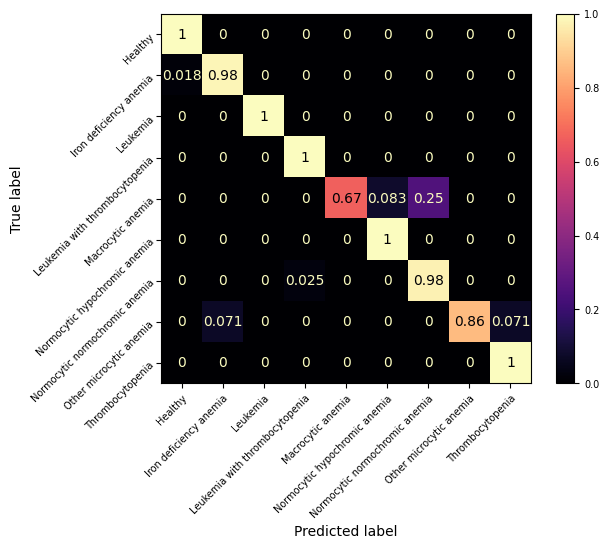

In [97]:
disp = ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        display_labels=categories,
        cmap='magma',
        normalize='true',
    )

plt.setp(disp.ax_.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(disp.ax_.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()